In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
X=dataset.iloc[:, [3, 4]].values

In [4]:
k = 5
mbk = MiniBatchKMeans(n_clusters=k, batch_size=5000, n_init=10, random_state=42)
mbk.fit(X)
labels_mbk = mbk.labels_          # cluster ID per point
centers = mbk.cluster_centers_

C:\Users\Nishok\miniconda3\envs\ml_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 6144 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [5]:
labels_mbk

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [6]:
centers

array([[55.05283224, 49.63834423],
       [26.1259542 , 21.96755725],
       [86.30595238, 18.0452381 ],
       [86.49113082, 81.89689579],
       [25.3815261 , 80.13453815]])

In [7]:
supervised=dataset
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
supervised['cluster_group']=labels_mbk
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


C:\Users\Nishok\miniconda3\envs\ml_env\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


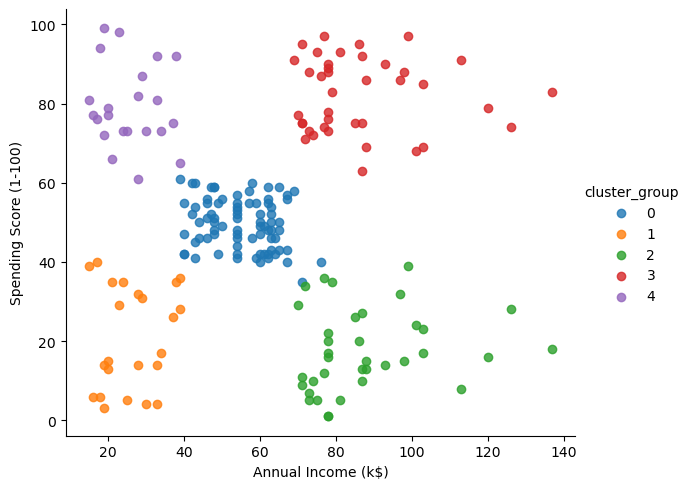

In [9]:
import seaborn as sns
xcol  = supervised.columns[3]
ycol  = supervised.columns[4]
huecol = supervised.columns[5]

facet = sns.lmplot(
    data=supervised,
    x=xcol, y=ycol, hue=huecol,
    fit_reg=False,        # drop regression line
    legend=True,
    legend_out=True,      # pass directly, not via facet_kws
    height=5, aspect=1.2 # optional sizing
)


In [10]:
from sklearn.metrics import silhouette_score
print("MBK silhouette:", silhouette_score(X, labels_mbk))

MBK silhouette: 0.5532176107575425
